<a href="https://colab.research.google.com/github/Kammarianand/single-linked-list/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("data_for_lr.csv")

In [24]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [25]:
data = data.dropna()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [27]:
train_input = np.array(data.x[:500]).reshape(500,1)
train_output = np.array(data.y[:500]).reshape(500,1)

In [28]:
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)


In [29]:
print(train_input.shape, train_output.shape)
print(test_input.shape, test_output.shape)


(500, 1) (500, 1)
(199, 1) (199, 1)


In [30]:
# forward propagation f(x) = mx + c
def forwarPropagation(train_input,parameters):
  m = parameters['m']
  c = parameters['c']
  prediction = np.multiply(m,train_input) + c
  return prediction


In [31]:
# cost function
# cf = (y - y )^2/2n

def costFunction(prediction,train_output):
  cost = np.mean((train_output-prediction) ** 2) * 0.5
  return cost

In [32]:
def backWordpropagation(train_input,train_output,prediction):
  derivaties = dict()
  df = prediction - train_output
  dm = np.mean(np.multiply(df,train_input))
  dc = np.mean(df)
  derivaties['dm'] = dm
  derivaties['dc'] = dc
  return derivaties

In [33]:
def updateParameters(parameters,derivaties,learning_rate):
  parameters['m'] = parameters['m'] - learning_rate * derivaties['dm']
  parameters['c'] = parameters['c'] - learning_rate * derivaties['dc']
  return parameters

In [34]:
import matplotlib.axes as ax

In [35]:
def train(train_input,train_output,learning_rate,iters):
  parameters = dict()
  parameters['m'] = np.random.uniform(0,1)
  parameters['c'] = np.random.uniform(0,1)

  plt.figure()

  loss = list()




  for i in range(iters):
    prediction = forwarPropagation(train_input,parameters)
    cost = costFunction(prediction,train_output)

    loss.append(cost)
    print(f'Iterations : {i+1}, loss : {cost}')

    # subplot
    fig,ax = plt.subplots()
    ax.plot(train_input,train_output,'+',label='Original')
    ax.plot(train_input,prediction,'-',label='Training')

    legend = ax.legend()

    plt.plot(train_input,train_output,'+',label='Original')
    plt.plot(train_input,prediction,'-',label='Training')
    plt.show()

    derivaties = backWordpropagation(train_input,train_output,prediction)

    update_parameter =  updateParameters(parameters,derivaties,learning_rate)

  return parameters,loss


Iterations : 1, loss : 571.5125461438429


<Figure size 640x480 with 0 Axes>

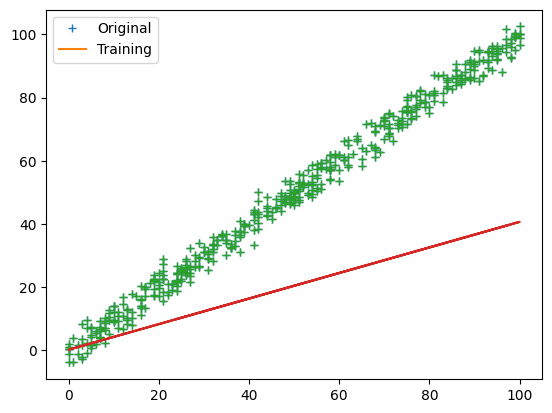

Iterations : 2, loss : 261.44622339339145


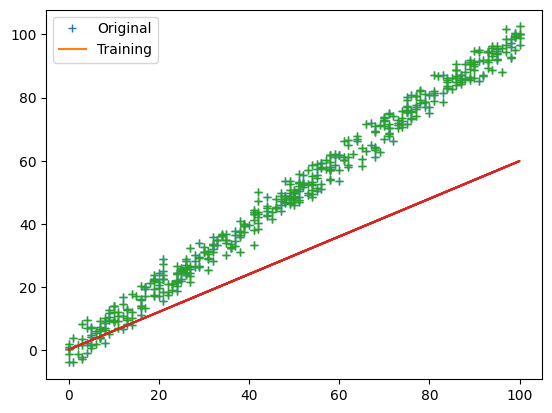

Iterations : 3, loss : 120.7687886078676


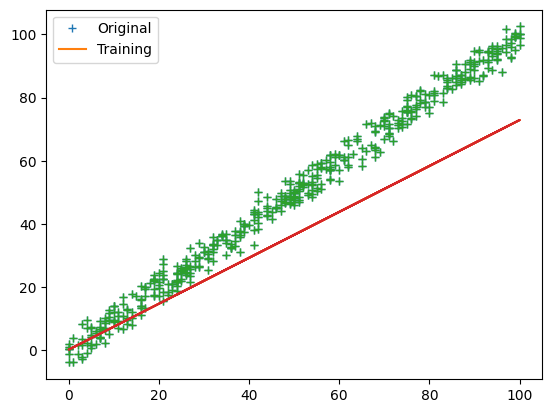

Iterations : 4, loss : 56.94327991418075


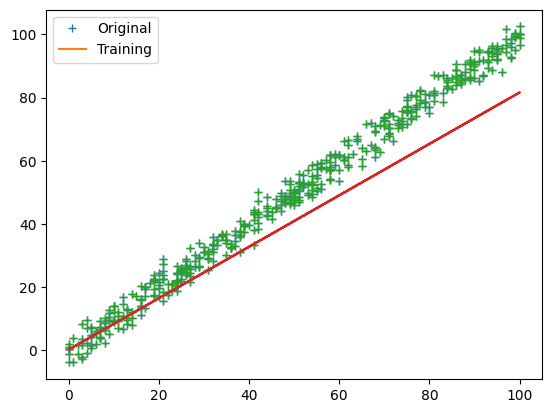

Iterations : 5, loss : 27.98557521275684


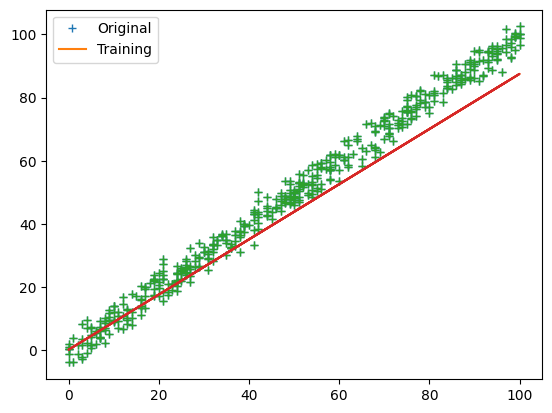

Iterations : 6, loss : 14.847431803675274


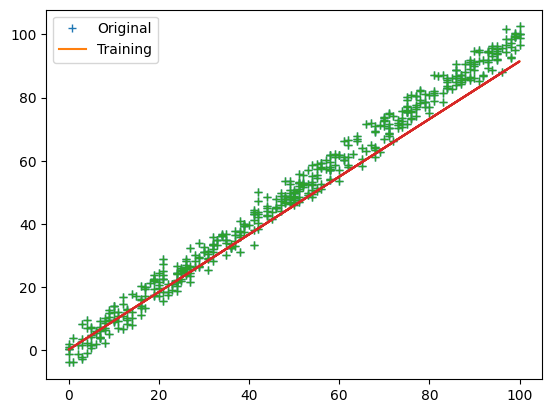

Iterations : 7, loss : 8.886640875363296


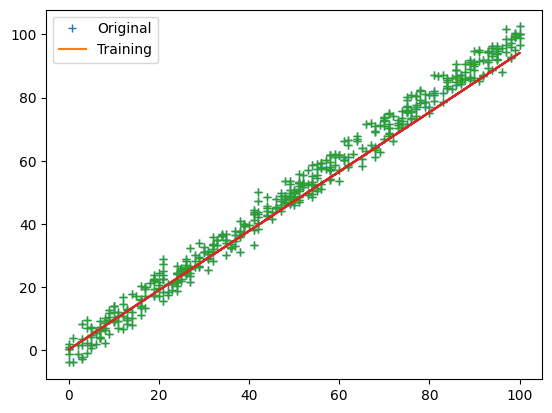

Iterations : 8, loss : 6.182222717543746


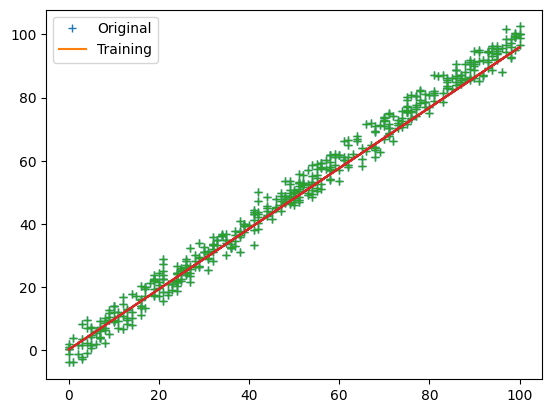

Iterations : 9, loss : 4.955224492625095


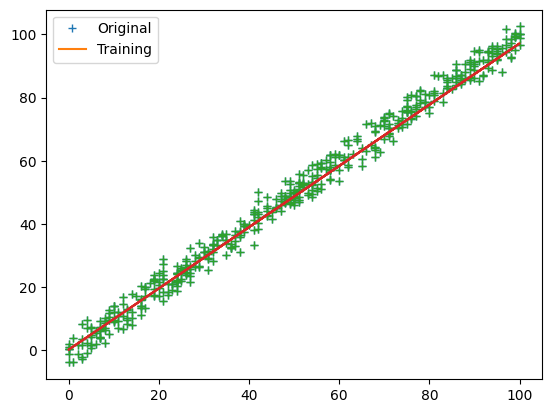

Iterations : 10, loss : 4.3985333277506395


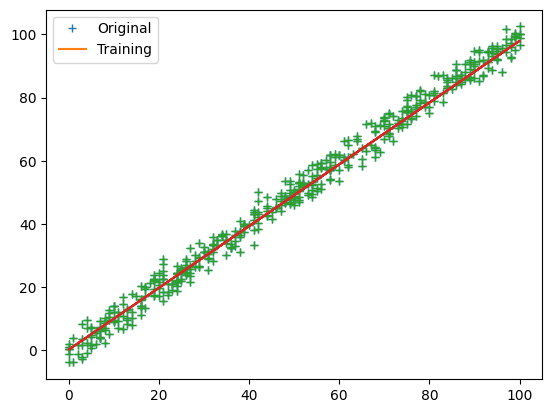

In [38]:
parameters,loss = train(train_input,train_output,0.0001,10)

In [39]:
print(parameters)

{'m': 0.982806040205058, 'c': 0.21672381458143947}


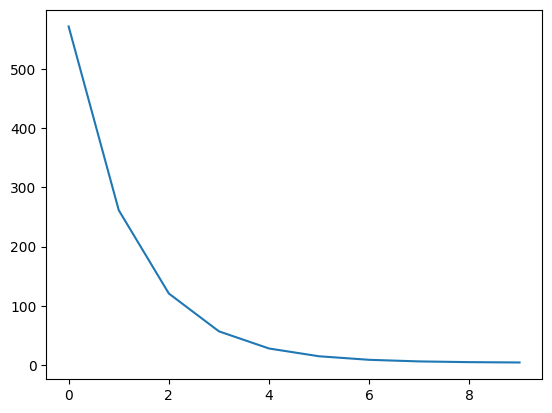

In [40]:
plt.plot(loss)

prediction

In [41]:
y_predict = test_input * parameters['m'] + parameters['c']

In [44]:
y_predict[:51]

array([[ 5.13075402],
       [60.16789227],
       [46.4086077 ],
       [96.53171575],
       [29.70090502],
       [62.13350435],
       [ 0.21672381],
       [98.49732784],
       [17.90723254],
       [29.70090502],
       [96.53171575],
       [15.94162046],
       [21.8384567 ],
       [54.27105603],
       [42.47738354],
       [73.92717683],
       [89.65207347],
       [45.42580166],
       [83.75523723],
       [54.27105603],
       [35.59774126],
       [48.37421978],
       [92.60049159],
       [42.47738354],
       [21.8384567 ],
       [36.5805473 ],
       [23.80406878],
       [93.58329763],
       [60.16789227],
       [73.92717683],
       [67.04753455],
       [57.21947415],
       [ 5.13075402],
       [52.30544395],
       [78.84120703],
       [81.78962515],
       [24.78687482],
       [33.63212918],
       [25.76968086],
       [88.66926743],
       [59.18508623],
       [48.37421978],
       [18.89003858],
       [90.63487951],
       [28.71809898],
       [ 8

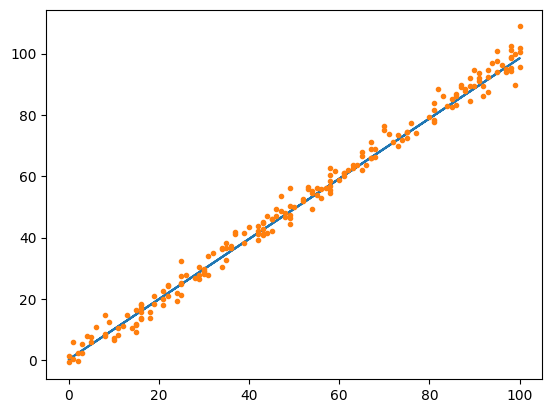

In [43]:
plt.plot(test_input,y_predict,'-')
plt.plot(test_input,test_output,'.')
plt.show()

In [46]:
costFunction(test_output,y_predict)

4.437670962714542